In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import io

from IPython.display import display
from PIL import Image
from IPython.display import HTML

RED 500 Green 2000 Blue 8000

In [2]:
# # 加载图像或视频
# image_path = 'Red.jpg'
image_path = 'Green.jpg'
# image_path = 'Blue.jpg'

In [3]:
def read_image_or_video(input_path):
    # 获取文件扩展名
    file_ext = os.path.splitext(input_path)[1].lower()
    #print(f"file_ext: {file_ext}")
    # 如果文件是图像格式，直接读取图像
    if file_ext in ['.png', '.jpg', '.jpeg', '.bmp', '.tiff']:
        image = cv2.imread(input_path)
        if image is None:
            print(f"无法读取图像文件: {input_path}")
        print(f"file_ext: {file_ext}图片")
        return image

    # 如果文件是视频格式，读取第一帧
    elif file_ext in ['.mp4', '.avi', '.mov', '.mkv', '.flv', '.wmv']:
        cap = cv2.VideoCapture(input_path)
        print(f"file_ext: {file_ext}视频")
        if not cap.isOpened():
            print(f"无法打开视频文件: {input_path}")
            return None

        ret, frame = cap.read()  # 读取视频的第一帧
        cap.release()  # 释放视频资源

        if ret:
            return frame
        else:
            print("无法读取视频的第一帧")
            return None

    else:
        print("不支持的文件格式")
        return None

image = read_image_or_video(image_path)



file_ext: .jpg图片


In [4]:

#image = cv2.imread(image_path)

# 将图像从BGR转换为RGB以便于matplotlib显示
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 分别提取 R, G, B 三个通道
r_channel = image_rgb[:, :, 0]  # 红色通道
g_channel = image_rgb[:, :, 1]  # 绿色通道
b_channel = image_rgb[:, :, 2]  # 蓝色通道

# 计算每个通道的像素总和
r_sum = np.sum(r_channel)
g_sum = np.sum(g_channel)
b_sum = np.sum(b_channel)

# 输出哪个颜色占比最多
if r_sum > g_sum and r_sum > b_sum:
    Base_Freq = 500 #in Hz
    print("红色占比最多")
elif g_sum > r_sum and g_sum > b_sum:
    Base_Freq = 2000 #in Hz
    print("绿色占比最多")
else:
    Base_Freq = 8000 #in Hz
    print("蓝色占比最多")


绿色占比最多


In [5]:
gray_image = cv2.normalize(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), None, 0, 255, cv2.NORM_MINMAX)

# 显示灰度图像
# plt.imshow(gray_image, cmap='gray')
# plt.title('Grayscale Image')
# plt.show()


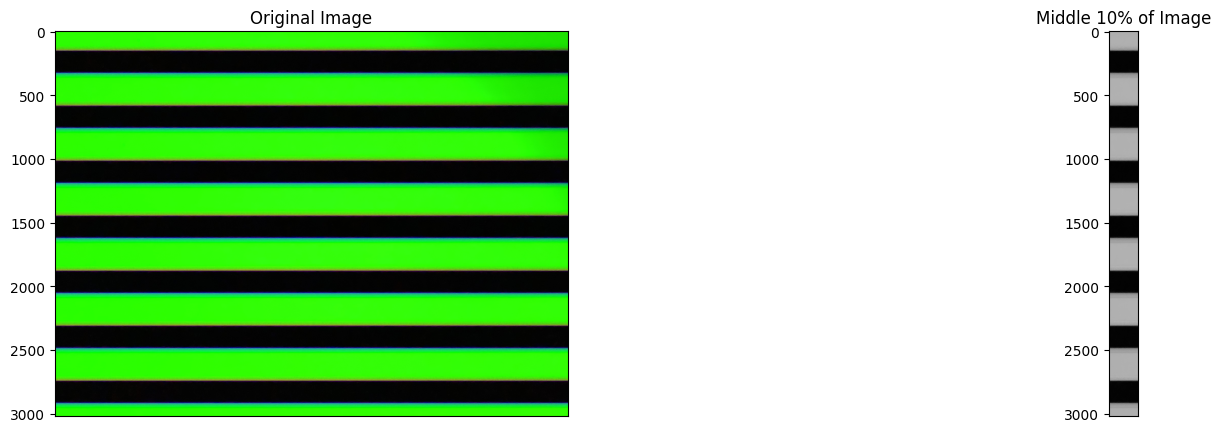

In [6]:
# 获取图像的高度和宽度
height, width = gray_image.shape

# 计算宽度的 10%
width_10_percent = int(width * 0.1)

# 计算中间部分的起始和结束列
start_col = (width - width_10_percent) // 2
end_col = start_col + width_10_percent

# 提取中间 10% 列的图像
middle_10_percent = gray_image[:, start_col:end_col]

# 计算中间 10% 列的平均值
mean_projection_middle = np.mean(middle_10_percent, axis=1)

# 打印结果
#print("中间 10% 列的 mean_projection:", mean_projection_middle)

# # 显示图像
# 原始
fig, axs = plt.subplots(1, 2, figsize=(20,5))
axs[0].imshow(image_rgb) 
axs[0].set_xticks([]) 
axs[0].set_title('Original Image')

# 中间 10% 区域
axs[1].imshow(middle_10_percent, cmap='gray', aspect=16/9) 
axs[1].set_title('Middle 10% of Image')
axs[1].set_xticks([]) 

plt.subplots_adjust(wspace=0.1) 
plt.show()

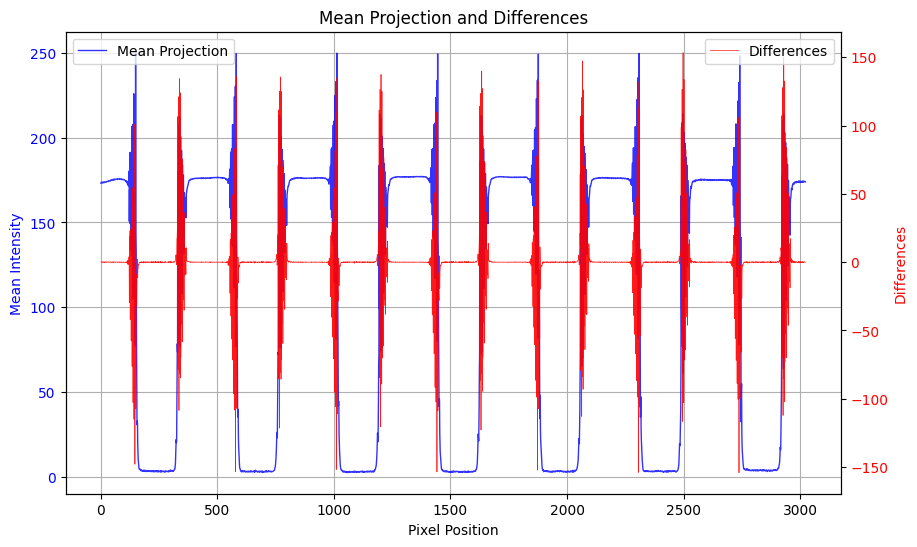

In [7]:
mean_projection = np.mean(middle_10_percent, axis=1)
differences = np.diff(mean_projection)
# 创建新的图形
fig, ax1 = plt.subplots(figsize=(10, 6))

# 绘制 mean_projection
ax1.plot(mean_projection, label='Mean Projection', color='blue', alpha=0.8, lw=1)
ax1.set_xlabel('Pixel Position')
ax1.set_ylabel('Mean Intensity', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Mean Projection and Differences')

# 创建第二个 y 轴
ax2 = ax1.twinx()  
ax2.plot(range(1, len(mean_projection)), differences, label='Differences', color='red', alpha=0.9, lw=0.5)
ax2.set_ylabel('Differences', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 添加图例（可选）
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 添加网格
ax1.grid()

# 显示图形
plt.show()

In [8]:
from scipy.ndimage import gaussian_filter1d 
sigma = 2
smoothed_projection_gaussian = gaussian_filter1d(mean_projection, sigma)

tolorate = 0.10

阈值: 90.24298175798049


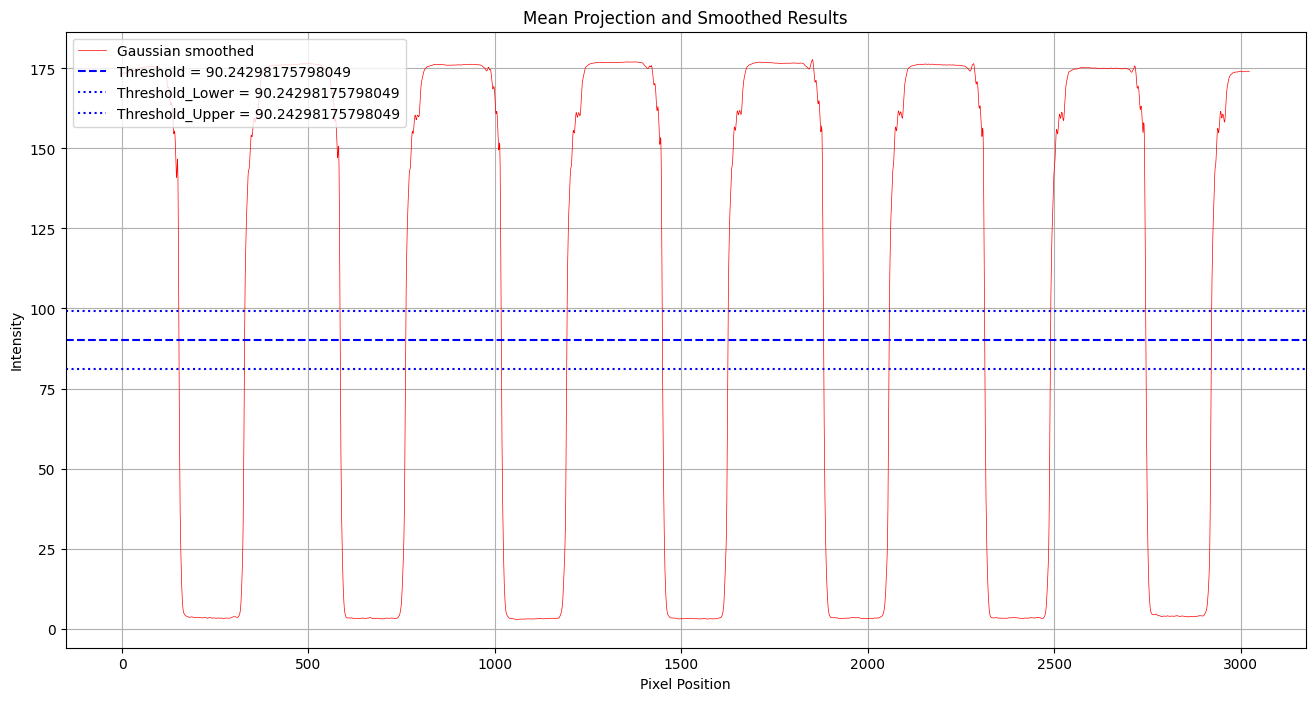

In [9]:
###### 步骤 3: 使用从大到小排列的最小 10% 值作为阈值
# sorted_projection = np.sort(smoothed_projection_gaussian)[::-1]  # 从大到小排序
# threshold_index = int(len(smoothed_projection_gaussian) * 0.60)  # 计算最小 10% 的索引
# threshold_value = sorted_projection[threshold_index]  # 获取阈值


threshold_value = (np.min(smoothed_projection_gaussian)+np.max(smoothed_projection_gaussian))/2


print(f"阈值: {threshold_value}")
# 绘制 Gaussian 滤波平滑结果
plt.figure(figsize=(16, 8))
plt.plot(smoothed_projection_gaussian, label='Gaussian smoothed', color='red', lw=0.5)
plt.axhline(y=threshold_value, color='blue', linestyle='--', label=f'Threshold = {threshold_value}')
plt.axhline(y=threshold_value*(1-tolorate), color='blue', linestyle=':', label=f'Threshold_Lower = {threshold_value}')
plt.axhline(y=threshold_value*(1+tolorate), color='blue', linestyle=':', label=f'Threshold_Upper = {threshold_value}')
# 添加标题和标签
plt.title('Mean Projection and Smoothed Results')
plt.xlabel('Pixel Position')
plt.ylabel('Intensity')
plt.legend(loc='upper left') 
plt.grid()

# 显示图形
plt.show()




In [10]:
np.savetxt("output.txt",smoothed_projection_gaussian,delimiter=',')

[154, 176, 256, 176, 256, 176, 256, 176, 256, 176, 256, 177, 256, 176, 101]
[176, 256, 176, 256, 176, 256, 176, 256, 176, 256, 177, 256]


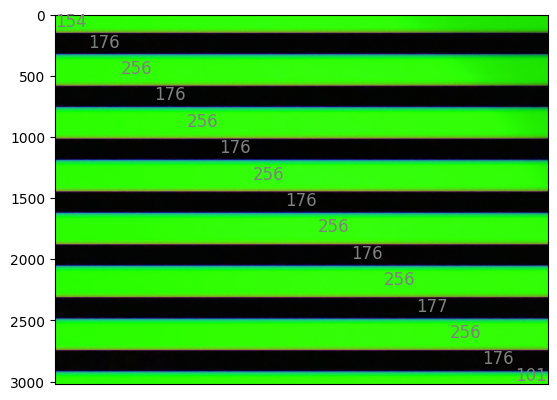

In [11]:
stripe_widths = []
current_width = 0
invert = bool(not(smoothed_projection_gaussian[0] > threshold_value)) #false if条带，true if 背景
#print(invert)
for lightvalue in smoothed_projection_gaussian:
    
    #根据之前的数据放宽判断标准，条带的后续尽量归入条带，背景的后续尽量归入背景

    adjusted_threshold = threshold_value * ((1+tolorate) if invert else (1-tolorate))
    if (lightvalue > adjusted_threshold) ^ (invert):  # 当前是条带
        current_width += 1
    else:  # 当前是背景
        if current_width > 0:
            stripe_widths.append(current_width)
            current_width = 1
            invert = not invert

#最后一个条带        
if current_width > 0:
    stripe_widths.append(current_width)

# 掐头去尾            
trimmed_stripe_widths = stripe_widths[1:-1] 
# 如果元素个数为奇数，去除最后一个元素
if len(trimmed_stripe_widths) % 2 == 1:
    trimmed_stripe_widths = trimmed_stripe_widths[:-1]  # 去除最后一个元素
    
print(stripe_widths)
print(trimmed_stripe_widths)

plt.imshow(image_rgb)
plt.gca().axes.get_xaxis().set_visible(False)
abs_y_pos = 0
for index, y_pos in enumerate(stripe_widths):
    abs_y_pos += y_pos
    plt.text(x=2+image_rgb.shape[1]/len(stripe_widths)*index, y=abs_y_pos-y_pos/2+20, s=stripe_widths[index], fontsize=12, color='gray')
plt.show()

In [12]:
#RollingShutterTime = (image height / height of bands measured * number of bands measured)*(1000/BaseFreq) in ms
RollingShutterTime = (len(mean_projection))/sum(trimmed_stripe_widths)*(len(trimmed_stripe_widths) / 2) * (1000/Base_Freq)

In [13]:
# 使用 HTML 显示并设置为蓝色
HTML(f'<span style="color: blue;font-size: 40px;">Base Freq: {Base_Freq }Hz<br>RollingShutterTime: {RollingShutterTime} ms</span>')
